In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection

In [10]:
#导入数据集
ccpp = pd.read_excel("CCPP.xlsx")

In [11]:
#看一下数据集大概情况
ccpp.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


AT表示高炉温度，V表示炉内压力，AP表示高炉相对湿度，RH表示高炉排气量，最后一列PE为连续性的因变量，表示高炉的发电量

In [13]:
#把数据集拆分成train和test
train,test = model_selection.train_test_split(ccpp,test_size = 0.2,random_state = 1234)

In [17]:
#根据train数据集建模
import statsmodels.api as sm
model = sm.formula.ols('PE~AT + V + AP + RH',data = ccpp).fit()
model.params

Intercept    454.609274
AT            -1.977513
V             -0.233916
AP             0.062083
RH            -0.158054
dtype: float64

In [18]:
#检验
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        20:51:48   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

得到多元回归模型：PE = 454.61 - 1.98AT - 0.23V + 0.06AP -0.15RH

## 正态性检验(直方图法和K-S法）(Shapiro在数据量小于5000时好用）

D:\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


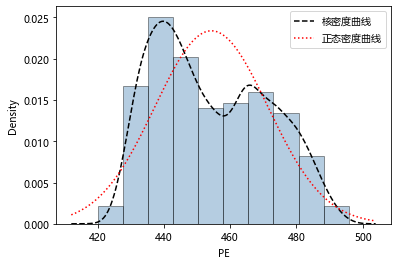

In [30]:
import scipy.stats as stats
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
sns.distplot(a = ccpp.PE,bins=10,fit =stats.norm,norm_hist=True,
            hist_kws = {'color':'steelblue','edgecolor':'black'},
            kde_kws  = {'color':'black','linestyle':"--",'label':'核密度曲线'},
            fit_kws  = {'color':'red','linestyle':':','label':'正态密度曲线'}
                )
plt.legend()
plt.show()

In [34]:
import numpy as np
rnorm = np.random.normal(loc=5,scale=2,size=10000)
runif = np.random.uniform(low=1,high=100,size=10000)
KS_Test1 = stats.kstest(rvs = rnorm,cdf = 'norm',args = (rnorm.mean(),rnorm.std()))
KS_Test2 = stats.kstest(rvs = runif,cdf = 'norm',args = (runif.mean(),runif.std()))
print(KS_Test1)
print(KS_Test2)

KstestResult(statistic=0.005677349692097877, pvalue=0.9020382542166271)
KstestResult(statistic=0.05893904604150901, pvalue=1.2250180944701581e-30)


In [21]:
#多重共线性检验

In [22]:
#线性相关性检验

In [23]:
#异常值检验

In [24]:
#方差齐性检验

In [25]:
#BP检验

In [26]:
#回归模型预测